In [1]:
import sys
sys.path.append('../src/')

In [2]:
# Third-party libraries:
import numpy as np
from sklearn.datasets import load_digits
# My libraries:
import dataset.dataset as dtset
from dbclass.dbclass import DBCLASS
from dbclass import dbclass_utils as db_utils

In [3]:
# import some data to play with
ds = load_digits()
ds['data'] = db_utils.get_pca_data(ds['data'], n_components=15)
ds

{'data': array([[-0.09413512,  1.66272073, -0.79471413, ...,  0.18258857,
         -0.72301257,  1.40646155],
        [ 0.59476828, -1.6231603 ,  0.37283291, ..., -0.54602087,
         -1.41126794, -0.5457089 ],
        [ 0.52259074, -0.77810179,  0.24846184, ...,  0.04463444,
          1.48144033, -0.39996347],
        ...,
        [ 0.80731022, -0.54397269,  0.47025462, ...,  0.74026353,
          0.27514867,  0.63464   ],
        [-0.36415081,  0.97098371, -0.85415667, ..., -2.00225931,
         -0.26853883,  2.55906621],
        [-0.02574039,  0.49749417,  0.90478379, ...,  0.9991224 ,
          1.53131792,  0.18951837]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'p

In [4]:
# Splitting the data for trainning and for test:
ds_train, ds_test = dtset.split_data(ds, prop_train=0.8)

0% concluído...
0% concluído...
10% concluído...
20% concluído...
30% concluído...
40% concluído...
50% concluído...
60% concluído...
70% concluído...
80% concluído...
90% concluído...


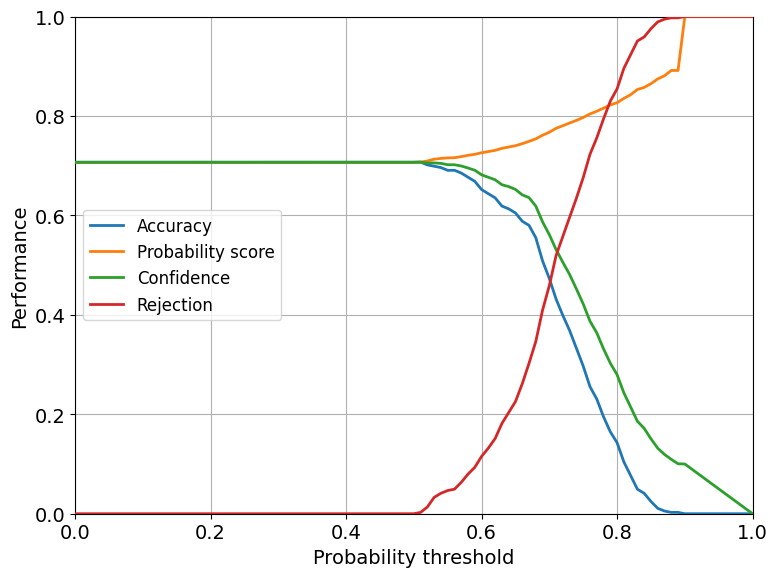


Best probability threshold value: 0.51
accuracy 0.707031
prob_score 0.707224
rejection 0.002704
confidence 0.707126


In [5]:
# Trainning the model using cross validation in the trainning dataset:
dbclass = DBCLASS()
# prob_thold_list = [0, 0.1, 0.2, 0.3] + list(np.arange(0.4, 0.6, 0.01)) + [0.6, 0.7, 0.8, 0.999]
prob_thold_list = np.append(np.arange(0, 1, 0.01), 0.999)
best_prob_thold, class_metrics = db_utils.cross_validation_trainning(dbclass, ds_train, ds_test, prob_thold_list)
print("\nBest probability threshold value:", best_prob_thold)
for metric in class_metrics.keys():
    print(metric, class_metrics[metric])

C:\Users\weldl\Miniconda3\envs\dbclass\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\weldl\Miniconda3\envs\dbclass\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\weldl\Miniconda3\envs\dbclass\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       1.00      0.58      0.74       178
           1       0.50      0.87      0.63       182
           2       0.89      0.76      0.82       177
           3       0.89      0.71      0.79       183
           4       0.84      0.87      0.86       181
           5       0.79      0.69      0.74       182
           6       0.97      0.82      0.89       181
           7       0.75      0.87      0.80       179
           8       0.79      0.72      0.75       174
           9       0.67      0.78      0.72       180
     Unknown       0.00      0.00      0.00         0

    accuracy                           0.77      1797
   macro avg       0.74      0.70      0.70      1797
weighted avg       0.81      0.77      0.77      1797


Confusion matrix:
[[5.79 1.11 0.11 0.06 0.28 0.72 0.06 1.56 0.   0.17 0.06]
 [0.   8.79 0.39 0.   0.   0.33 0.   0.06 0.22 0.33 0.  ]
 [0.   0.72 7.51 0.06 0.   0.06 0.   0.28 0.78 0.45 

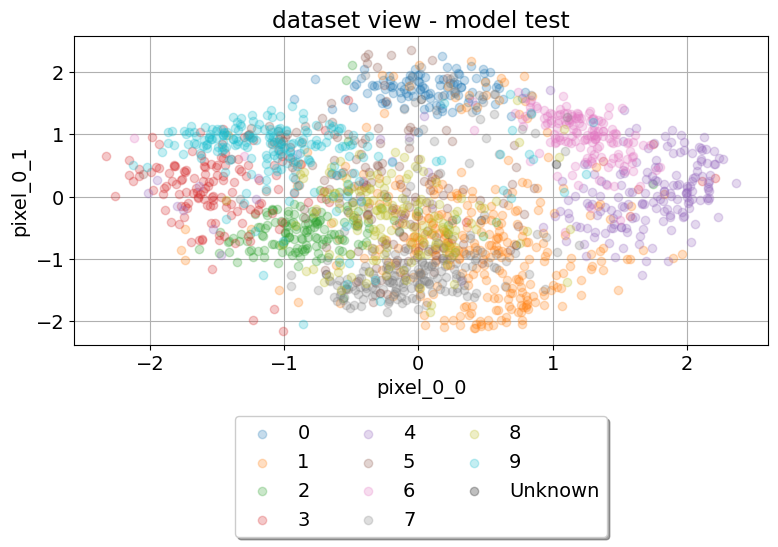

In [6]:
# Once the best probability score threshold is found, the classifier is
# configured with the best settings:
dbclass = DBCLASS(prob_thold=best_prob_thold)
dbclass.fit(ds['data'], ds['target'])
db_utils.dbclass_model_test(dbclass, ds)